# Быстрое развертывание веб-приложения машинного обучения 

# Streamlit

Streamlit - это быстрый способ создать приложение для обработки данных

Допустим, вам нужно быстро создать приложение для обработки данных. Он может прогуляться в себя панель инструментов и работать с моделью. Или, если вам нужен быстрый прототип для демонстрации заказчику, что можно сделать за несколько часов и бесплатно.

Streamlit идеально подходит для этих задач. 

ВСделаем очень простой дашборд с выбором типа ирисов и построением гистограмм. Также в Streamlit вы можете обучать и создавать модели вывода.

In [2]:
### УСТАНОВКА
!pip install streamlit

  Created wheel for watchdog: filename=watchdog-1.0.1-py3-none-any.whl size=72208 sha256=7be3a8eafbab930aad43991e1dae66f2606bd2cdf46e0ee3f1961900462c4645
  Stored in directory: c:\users\vadim\appdata\local\pip\cache\wheels\1d\3d\5d\3788fbd727d756019a83b013e46d40821b089ea9bc4584df71
Successfully built watchdog


В этих строках мы импортируем библиотеки streamlit и pandas, назначая им, соответственно, псевдонимы st и pd. Мы, кроме того, импортируем пакет datasets из библиотеки scikit-learn (sklearn). Мы воспользуемся этим пакетом ниже, в команде iris = datasets.load_iris(), для загрузки интересующего нас набора данных. И наконец, тут мы импортируем функцию RandomForestClassifier() из пакета sklearn.ensemble.

In [3]:
import streamlit as st
import pandas as pd
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

В этой строке мы описываем заголовок боковой панели, используя функцию st.sidebar.header(). Обратите внимание на то, что тут sidebar стоит между st и header(), что и даёт полное имя функции st.sidebar.header(). Эта функция сообщает библиотеке streamlit о том, что мы хотим поместить заголовок в боковую панель.

In [4]:
st.sidebar.header('User Input Parameters')

Здесь мы объявляем функцию user_input_features(), которая берёт данные, введённые пользователем (то есть — четыре характеристики цветка, которые вводятся с использованием ползунков), и возвращает результат в виде датафрейма. Стоит отметить, что каждый входной параметр вводится в систему с помощью ползунка. Например, ползунок для ввода длины чашелистика (sepal length) описывается так: st.sidebar.slider(‘Sepal length’, 4.3, 7.9, 5.4). Первый из четырёх входных аргументов этой функции задаёт подпись ползунка, выводимую выше него. Это, в данном случае, текст Sepal length. Два следующих аргумента задают минимальное и максимальное значения, которые можно задавать с помощью ползунка. Последний аргумент задаёт значение, выставляемое на ползунке по умолчанию, при загрузке страницы. Здесь это — 5.4.

In [5]:
def user_input_features():
    sepal_length = st.sidebar.slider('Sepal length', 4.3, 7.9, 5.4)
    sepal_width = st.sidebar.slider('Sepal width', 2.0, 4.4, 3.4)
    petal_length = st.sidebar.slider('Petal length', 1.0, 6.9, 1.3)
    petal_width = st.sidebar.slider('Petal width', 0.1, 2.5, 0.2)
    data = {'sepal_length': sepal_length,
            'sepal_width': sepal_width,
            'petal_length': petal_length,
            'petal_width': petal_width}
    features = pd.DataFrame(data, index=[0])
    return features

In [6]:
df = user_input_features()

Здесь датафрейм, сформированный функцией user_input_features() записываем в переменную df.

In [7]:
iris = datasets.load_iris()

Загрузка набора данных Iris из пакета sklearn.datasets и запись его в переменную iris.

Создание переменной Х, содержащей сведения о 4 характеристиках цветка, которые имеются в iris.data.


Создание переменной Y, которая содержит сведения о виде цветка. Эти сведения хранятся в iris.target.

In [8]:
X = iris.data
Y = iris.target


Здесь мы, пользуясь функцией RandomForestClassifier(), назначаем классификатор, основанный на алгоритме «случайный лес», переменной clf

In [9]:
clf = RandomForestClassifier()

Здесь мы, пользуясь функцией RandomForestClassifier(), назначаем классификатор, основанный на алгоритме «случайный лес», переменной clf.

In [10]:
clf.fit(X, Y)

RandomForestClassifier()


Получение сведений о виде цветка с помощью обученной модели.

In [11]:
prediction = clf.predict(df)


Получение сведений о прогностической вероятности.

In [12]:
prediction_proba = clf.predict_proba(df)

# Формирование основной панели

Здесь мы, пользуясь функцией st.write(), выводим текст. А именно, речь идёт о заголовке, выводимом в главной панели приложения, текст которого задан в формате Markdown. Символ # используется для указания того, что текст является заголовком. За строкой заголовка идёт строка обычного текста

In [13]:
st.write("""
# Simple example!
""")

In [25]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.4,3.4,1.3,0.2


В этой строке, пользуясь функцией st.subheader(), мы указываем подзаголовок, выводимый в основной панели. Этот подзаголовок используется для оформления раздела страницы, в котором будет выведено содержимое датафрейма, то есть того, что было введено пользователем с помощью ползунков.

In [14]:
st.write(df)

Этой командой мы выводим на основную панель содержимое датафрейма df.

In [15]:
st.subheader('Class labels and their corresponding index number')


Данный код описывает второй подзаголовок основной панели. В этом разделе будут выведены данные о видах цветков.

In [16]:
st.write(iris.target_names)

здесь, во второй раздел основной панели, выводятся названия видов цветков (setosa, versicolor и virginica) и соответствующие им номера (0, 1, 2)

In [17]:
st.subheader('Prediction')

Вывод третьего подзаголовка для раздела, в котором будет находиться результат классификации.

Вывод результата классификации. Стоит отметить, что содержимое переменной prediction — это номер вида цветка, выданный моделью на основе входных данных, введённых пользователем. Для того чтобы вывести название вида, используется конструкция iris.target_names[prediction].

In [18]:
st.write(iris.target_names[prediction])

Выводим заголовок четвёртого (и последнего) раздела основной панели. Здесь будут представлены данные о прогностической вероятности.


In [19]:
st.subheader('Prediction Probability')

Вывод данных о прогностической вероятности.

In [20]:
st.write(prediction_proba)

# Запуск веб-приложения

In [22]:
streamlit run filename.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...

Error: Invalid value: File does not exist: iris-ml-app.py


In [ ]:
streamlit run newfile.py

## Задание. Развернуть модель для любой задачи

(59, 7)
['apple' 'mandarin' 'orange' 'lemon']
fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


C:\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


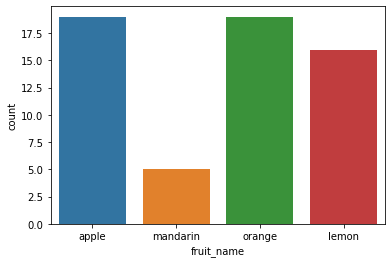

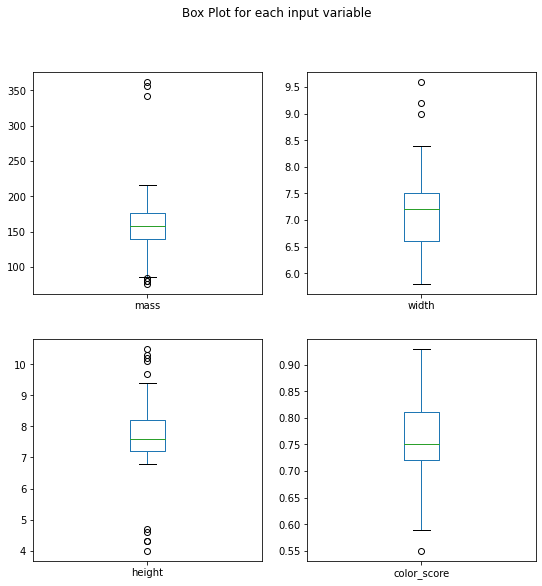

In [45]:
# %matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

print(fruits.shape)

print(fruits['fruit_name'].unique())

print(fruits.groupby('fruit_name').size())

import seaborn as sns
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

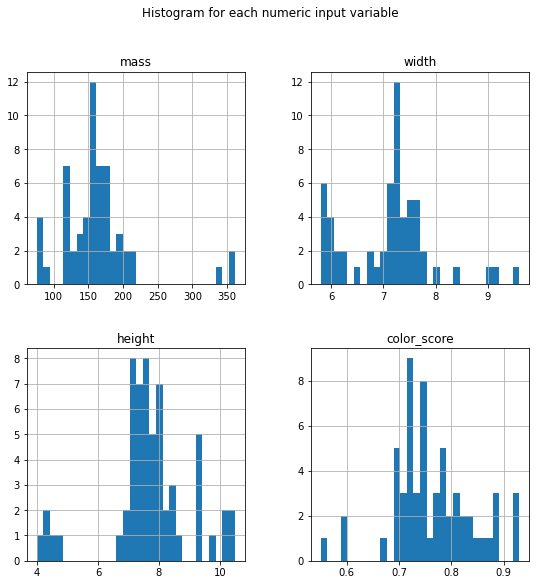

In [46]:
import pylab as pl
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.47
Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.87
Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.67
Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67
Accuracy of SVM classifier on training set: 0.91
Accuracy of SVM classifier on test set: 0.80
[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro av

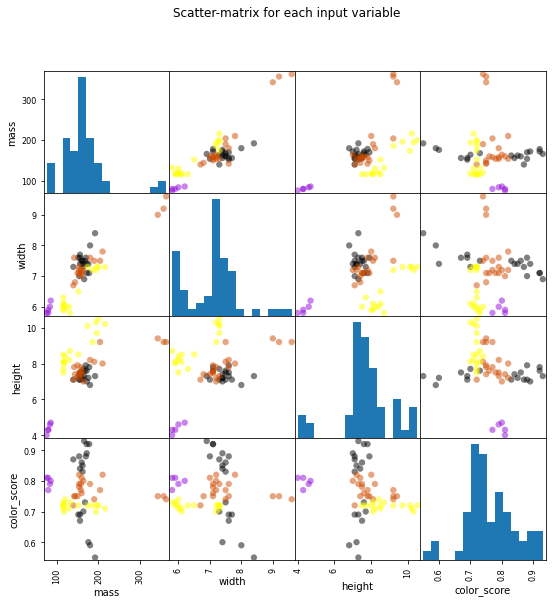

In [47]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

import numpy as np

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))


from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))



from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

In [48]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
               % (n_neighbors, weights))    
    plt.show()
    

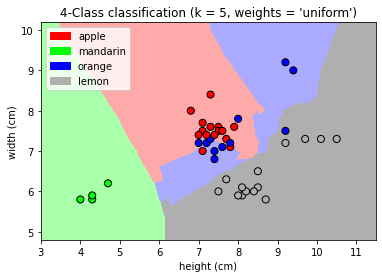

([<matplotlib.axis.XTick at 0x2f6edc4df08>,
 <a list of 5 Text major ticklabel objects>)

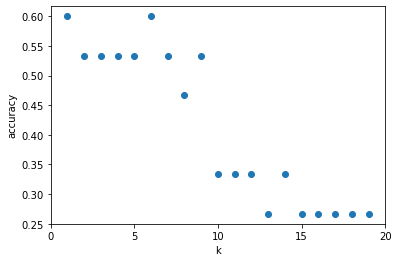

In [49]:
plot_fruit_knn(X_train, y_train, 5, 'uniform')


k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2

Просмотреть и добавить 

Создание и развертывание веб-приложений машинного обучения с использованием Pycaret, Streamlit и Heroku   
    
    https://analyticsindiamag.com/guide-to-building-and-deploying-ml-web-applications-using-pycaret-streamlit-and-heroku/

Примеры
https://leaveprediction.herokuapp.com/
    

Виджеты для форм 

https://towardsdatascience.com/how-to-build-interactive-dashboards-in-python-using-streamlit-1198d4f7061b
    
Установка

https://docs.streamlit.io/en/stable/installation.html


Пример разработки приложения

https://docs.streamlit.io/en/stable/tutorial/create_a_data_explorer_app.html#


https://ichi.pro/ru/kak-sozdat-prilozenie-dla-klassifikacii-izobrazenij-s-ispol-zovaniem-logisticeskoj-regressii-i-myslenia-nejronnoj-seti-33604303553365


Как развернуть приложение

https://docs.streamlit.io/en/stable/deploy_streamlit_app.html

https://medium.com/bloggers-bay/give-life-to-your-data-science-apps-using-streamlit-9b61dfe1085d

https://nuancesprog.ru/p/5097/

https://blog.skillfactory.ru/nauka-o-dannyh-data-science/kak-napisat-veb-prilozhenie-dlya-demonstratsii-data-science-proekta-na-python/
